In [1]:
# 1. Importar las bibliotecas necesarias
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Crear el directorio del proyecto (carpeta para guardar análisis)
project_dir = 'results_gridSearchCSV'
if not os.path.exists(project_dir):
    os.makedirs(project_dir)

In [3]:
# Cargar los datos CSV
df = pd.read_csv("olympics_dataset.csv")
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [4]:
# 4. Análisis exploratorio de los datos
data_clean = df.dropna()  # Removemos filas con valores nulos, si aplica

In [5]:
# Identificar columnas categóricas (cualquier columna con tipo de dato 'object')
categorical_columns = data_clean.select_dtypes(include=['object']).columns

In [6]:
# Aplicar LabelEncoder a cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_clean[column] = le.fit_transform(data_clean[column])
    label_encoders[column] = le  # Guardamos los codificadores

## **Aplicación del Algoritmo Decision Trees** ##

In [7]:
# Selección de características
X = data_clean.drop('Medal', axis=1)  # Características
y = data_clean['Medal']  # Variable objetivo

In [8]:
# 5. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# 6. Definir los hiperparámetros que queremos ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función de división
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 10, 20],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 5, 10],  # Mínimo de muestras en un nodo hoja
    'max_features': [None, 'sqrt', 'log2']  # Número de características consideradas para la mejor división
}

In [10]:
# 7. Configurar el modelo con GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [11]:
# 8. Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [12]:
# 9. Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:\n", grid_search.best_params_)

Mejores hiperparámetros encontrados:
 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [13]:
# 10. Evaluar el modelo con los mejores parámetros
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

In [14]:
# 11. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo con los mejores hiperparámetros: {:.2f}%".format(accuracy * 100))

Precisión del modelo con los mejores hiperparámetros: 88.30%


In [15]:
# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[ 1708   192  1868   134]
 [  224  2178  1327   194]
 [ 1279   903 61392   572]
 [  229   296  1647  1627]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.50      0.44      0.47      3902
           1       0.61      0.56      0.58      3923
           2       0.93      0.96      0.94     64146
           3       0.64      0.43      0.51      3799

    accuracy                           0.88     75770
   macro avg       0.67      0.59      0.63     75770
weighted avg       0.87      0.88      0.88     75770



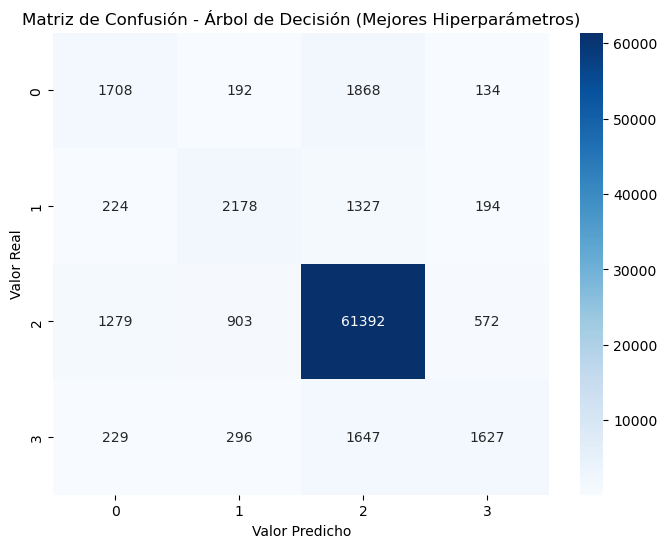

In [16]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión (Mejores Hiperparámetros)')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.savefig(os.path.join(project_dir, 'confusion_matrix_best_params.png'))  # Guardamos la matriz de confusión
plt.show()

In [17]:
# 12. Guardar los resultados de la búsqueda de hiperparámetros
result_file_path = os.path.join(project_dir, 'grid_search_results.txt')
with open(result_file_path, 'w') as f:
    f.write("Mejores hiperparámetros encontrados:\n")
    f.write(str(grid_search.best_params_) + "\n")
    f.write("\nPrecisión del modelo: {:.2f}%\n".format(accuracy * 100))
    f.write("\nMatriz de Confusión:\n")
    f.write(str(conf_matrix) + "\n")
    f.write("\nReporte de Clasificación:\n")
    f.write(classification_report(y_test, y_pred))